In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

## 生成房价数据

In [2]:
# 面积
areas = np.random.randint(100,1000,size=100)
areas

array([435, 723, 874, 875, 253, 112, 840, 989, 741, 259, 170, 370, 531,
       426, 746, 397, 709, 392, 572, 789, 101, 541, 368, 653, 196, 127,
       649, 362, 388, 974, 306, 693, 605, 724, 847, 854, 346, 574, 322,
       799, 669, 477, 295, 469, 901, 513, 318, 375, 804, 965, 773, 903,
       276, 941, 479, 652, 394, 771, 428, 257, 144, 558, 474, 359, 379,
       578, 676, 871, 349, 264, 605, 752, 669, 192, 768, 489, 951, 309,
       851, 983, 854, 137, 479, 919, 957, 794, 251, 987, 273, 141, 518,
       969, 519, 744, 585, 328, 749, 628, 247, 283])

In [3]:
# 线性函数的参数
a = 0.4
b = 100
# 噪音
noises = np.random.random(100)*200

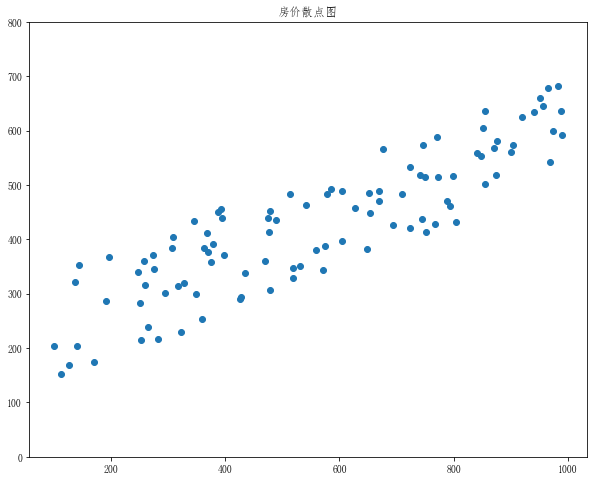

In [4]:
# 房价
prices = areas * a + b + noises
plt.figure(figsize=(10,8))
plt.scatter(areas, prices)
plt.title(r'房价散点图')
plt.ylim(0,800)
plt.show()

## 梯度下降，求线性函数参数值

In [5]:
# 初始化两个参数及设置学习率
A = 10.
B = 10.
lr = 0.000001
for i in range(40):
    #计算房价
    calcu_prices = A * areas + B
    # 计算代价函数
    cost = (np.square(calcu_prices - prices)).mean() * 0.5
    # 计算更正量
    deltA = ((calcu_prices-prices)*areas).mean()
    deltB = (calcu_prices-prices).mean()
    A = A - lr*deltA
    B = B - lr*deltB
    print("Itera:{:<3d} ,cost:{:<15.4f}, A:{:<.4f}, B:{:<.4f}".format(i, cost, A, B))

Itera:0   ,cost:16345823.5000  , A:6.4886, B:9.9948
Itera:1   ,cost:6341543.4346   , A:4.3019, B:9.9916
Itera:2   ,cost:2461941.8953   , A:2.9402, B:9.9896
Itera:3   ,cost:957455.0147    , A:2.0922, B:9.9884
Itera:4   ,cost:374023.7649    , A:1.5641, B:9.9877
Itera:5   ,cost:147772.5238    , A:1.2353, B:9.9872
Itera:6   ,cost:60033.6098     , A:1.0305, B:9.9869
Itera:7   ,cost:26008.9694     , A:0.9030, B:9.9868
Itera:8   ,cost:12814.4114     , A:0.8236, B:9.9867
Itera:9   ,cost:7697.6381      , A:0.7741, B:9.9866
Itera:10  ,cost:5713.3827      , A:0.7433, B:9.9866
Itera:11  ,cost:4943.8994      , A:0.7241, B:9.9866
Itera:12  ,cost:4645.4977      , A:0.7122, B:9.9866
Itera:13  ,cost:4529.7787      , A:0.7048, B:9.9867
Itera:14  ,cost:4484.9029      , A:0.7001, B:9.9867
Itera:15  ,cost:4467.4998      , A:0.6973, B:9.9867
Itera:16  ,cost:4460.7504      , A:0.6955, B:9.9867
Itera:17  ,cost:4458.1324      , A:0.6943, B:9.9868
Itera:18  ,cost:4457.1166      , A:0.6936, B:9.9868
Itera:19  ,c

## 拟合结果

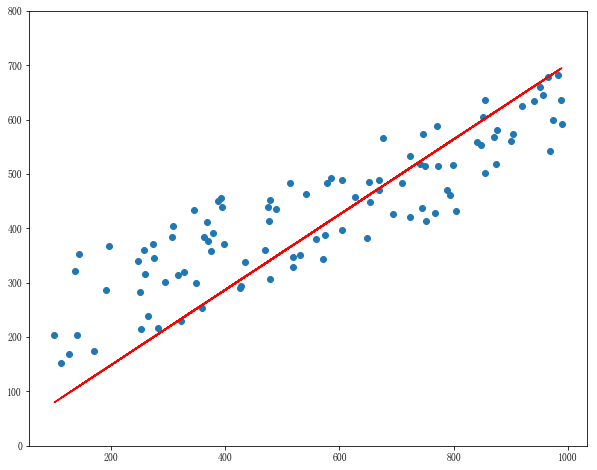

In [6]:
pre_prices = A * areas + B
plt.figure(figsize=(10,8))
plt.scatter(areas, prices)
plt.plot(areas, pre_prices,'r-')
plt.ylim(0,800)
plt.show()

# 正规方程拟合房价

In [7]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y    #X.T@X 等价于 X.T.dot(X)
    return theta

In [8]:
x0 = np.ones_like(areas)
x0 = x0.reshape([-1,1])
x1 = areas.reshape([-1,1])
X_ = np.concatenate([x0,x1],1)
X_

array([[  1, 435],
       [  1, 723],
       [  1, 874],
       [  1, 875],
       [  1, 253],
       [  1, 112],
       [  1, 840],
       [  1, 989],
       [  1, 741],
       [  1, 259],
       [  1, 170],
       [  1, 370],
       [  1, 531],
       [  1, 426],
       [  1, 746],
       [  1, 397],
       [  1, 709],
       [  1, 392],
       [  1, 572],
       [  1, 789],
       [  1, 101],
       [  1, 541],
       [  1, 368],
       [  1, 653],
       [  1, 196],
       [  1, 127],
       [  1, 649],
       [  1, 362],
       [  1, 388],
       [  1, 974],
       [  1, 306],
       [  1, 693],
       [  1, 605],
       [  1, 724],
       [  1, 847],
       [  1, 854],
       [  1, 346],
       [  1, 574],
       [  1, 322],
       [  1, 799],
       [  1, 669],
       [  1, 477],
       [  1, 295],
       [  1, 469],
       [  1, 901],
       [  1, 513],
       [  1, 318],
       [  1, 375],
       [  1, 804],
       [  1, 965],
       [  1, 773],
       [  1, 903],
       [  1,

In [9]:
y = prices.reshape([-1,1])
theta = normalEqn(X_, y)

In [10]:
theta = np.squeeze(theta)
theta

array([188.10056044,   0.42869984])

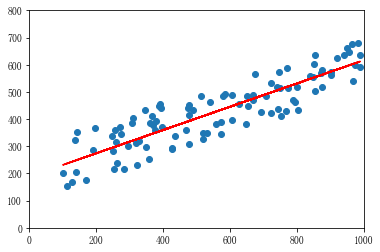

In [11]:
# x_lin = np.linspace(1,1000,1000)
prices_pre = theta[1] * areas + theta[0]
plt.scatter(areas, prices)
plt.plot(areas, prices_pre, 'r-')
plt.xlim(0,1000)
plt.ylim(0,800)
plt.show()